In [0]:
# Fill in your name using the format below and student ID number
your_name = "Wu, Huiyao"
student_id = "1461214"

In [0]:
# Before submission, set this to True so that you can render and verify this notebook without training deep learning models.
# Any deep learning models will be trained from file instead.
stop_training = True

In [3]:
# Uncomment the following line to run in Google Colab
pip install --quiet openml 

     |████████████████████████████████| 163kB 2.7MB/s 


In [4]:
# Uncomment the following line to run in Google Colab
%tensorflow_version 2.x
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU') # Check whether GPUs are available

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [0]:
%matplotlib inline
import openml as oml
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [6]:
from packaging import version
import sklearn
import tensorflow
sklearn_version = sklearn.__version__
tensorflow_version = tensorflow.__version__
if version.parse(sklearn_version) < version.parse("0.22.0"):
    print("scikit-learn is outdated. Please update now!")
if version.parse(tensorflow_version) < version.parse("2.1.0"):
    print("Tensorflow is outdated. This is version {}. Please update to 2.1.".format(tensorflow_version))
else:
    print("Hi{}, Looks good. You may continue :)".format(your_name.split(",")[1]))

Hi Huiyao, Looks good. You may continue :)


# Assignment 3

### Choice of libraries
We recommend to use Tensorflow in this assignment since that is what we covered in the labs. If you feel confident using PyTorch (and Skorch for the scikit-learn wrapper), that is allowed too, as long as you are able to implement the requested functions and return the requested data. Read the assignment carefully and ensure that you can. Note that you may also need to do a bit more work to implement certain helper functions and wrappers.

### Storing and submitting files
You must be able to store your models and submit them to GitHub Classroom. The evaluation functions used in this notebook will automatically store models for you.

If you want to run and solve the notebook on your local machine/laptop, fill in the path 'base_dir' to your assignment folder into the next cell.

If you use Colab, we recommend that you link it to your Google Drive:  
* Upload the assignment folder to your Google Drive (+ New > Folder Upload)
* Open Colab in a browser, open the 'Files' menu in the left sidebar, and click 'Mount Drive'
  * At this point you may need to authenticate
* Fill in the path to your assignment folder below
  * It's likely '/content/drive/My Drive/assignment-3-yourname'

In [0]:
base_dir = '/content/drive/My Drive/assignment-3-SwanyWu-master' # For Google Colab
#base_dir = './'

In [8]:
#Uncomment to link Colab notebook to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Using GPUs
While you can solve this assignment on a CPU, using a GPU will speed things up training quite a bit. If you have a local GPU, you can use that. If you don't, we recommend Google Colab. When you are in Colab:
* In Runtime > Change runtime type, select the GPU under Hardware Accelerator
* Run the 3rd cell on the top of this notebook to check that the GPU is found.

Note that Colab may not always have GPUs ready all the time, and may deny you a GPU when you have used them a lot. When you are temporarily 'locked out', you can switch to a non-GPU runtime or to a local instance of Jupyter running on your machine.

### Constraints
* Your stored models should not be larger than 100MB when stored in file. GitHub will not allow uploading if they are.
* When questions ask you to provide an explanation, it should be less than 500
characters long. Some questions have a higher limit. Always answer in full sentences.
* Don't train for more than 100 epochs, i.e. don't throw excessing computational resources at the problem. If your model hasn't converged by then, think of ways it could be made to converge faster. In this assignment you are not after the last tiny improvement, you can stop when learning curves flatten out. Do at least 5 epochs to get a reasonable learning curve.

### Grading
Grading is based on the following aspects:
* Correctness in answering the question. Carefully read the question and answer
what is asked for. Train your models on the correct data. It should be clear on which data should be trained, but ask when in doubt. When something is not defined (e.g. the number of epochs or batch size), you can freely choose them.
* Clarity of your explanations. Write short but precise descriptions of what you did and why. Give short but clear explanations of the observed performance. 
After your explanation, your approach and model should make perfect sense. Refrain from using symbols as substitute for words in your explanation (e.g. no: "More layers -> more parameters" yes: "More layers mean more parameters"). 
* Part of your grade depends on how well your model performs. When the question says 'you should at least get x%', x% will give you a good but not the maximal grade. You can get the full grade when you are close to what is the expected maximal performance. You don't need to invest lots of effort into the last tiny improvement, though. Unless specified, we look at the accuracy on the validation set. If your learning curves are very erratic we'll compute a score based on the smoothed curves (i.e. single peaks don't count).
* The weight of each question is indicated. Take this into account when planning your time.

### Other tips
* Don't wait until the last minute to do the assignment. The models take time to train, most questions will require some thinking, and some require you to read up on some new concepts.
* Take care that you upload the results as requested. You need to submit not only the notebooks but also the trained models and learning curves (training histories). Be sure to run the verification script and check that all the results are included.
* We provide an evaluation function that also stored models to disk. After you are done training the model, set the 'train' attribute to False so that the model doesn't train again (and loads from file instead) when you restart and rerun your notebook.
* Explore. For many questions we'll ask you to explain your model design decisions. You cannot magically know the best solutions but you can experiment
based on your understanding and make decisions based on both your knowledge and experiments. Your explanation is at least as important as the performance of your model.
* Be original. We will check for plagiarism between student submissions.

### Data
The [Street View House Numbers Dataset](https://www.openml.org/d/41081) contains 32-by-32 RGB images centered around a single digit of a house number appearing in Google Street View. Many of the images do contain some distractors at the sides. It consists of 10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 10. Your goal is to build models that recognize the correct digit.

If you use Colab, uncomment the following to cache the dataset inside the VM. This will make reloading faster if you need to restart your notebook. After longer periods of inactivity, your VM may be recycled and the cache lost, in which case the dataset will be downloaded again. Also note that this dataset is about 1Gb large, and will take even more space in memory. You may need to switch to a high-RAM environment (Colab will ask you if you hit the limit).

In [0]:
# Use OpenML caching in Colab
# On your local machine, it will store data in a hidden folder '~/.openml'
import os
# oml.config.cache_directory = os.path.expanduser('/content/cache')

In [0]:
# Download Streetview data. Takes a while (several minutes), and quite a bit of
# memory when it needs to download. After caching it loads faster.
SVHN = oml.datasets.get_dataset(41081)
X, y, _, _ = SVHN.get_data(dataset_format='array',
    target=SVHN.default_target_attribute)

Reshape, sample and split the data

In [0]:
from tensorflow.keras.utils import to_categorical

Xr = X.reshape((len(X),32,32,3))
Xr = Xr / 255.
yr = to_categorical(y)

In [12]:
# DO NOT EDIT. DO NOT OVERWRITE THESE VARIABLES.
from sklearn.model_selection import train_test_split
# We do an 80-20 split for the training and test set, and then again a 80-20 split into training and validation data
X_train_all, X_test, y_train_all, y_test = train_test_split(Xr,yr, stratify=yr, train_size=0.8, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_all,y_train_all, stratify=y_train_all, train_size=0.8, random_state=1)
print(X_train.shape)
print(X_val.shape)
evaluation_split = X_train, X_val, y_train, y_val

(63544, 32, 32, 3)
(15887, 32, 32, 3)


Check the formatting - and what the data looks like

In [0]:
# from random import randint

# # Takes a list of row ids, and plots the corresponding images
# # Use grayscale=True for plotting grayscale images
# def plot_images(X, y, grayscale=True):
#     fig, axes = plt.subplots(1, len(X),  figsize=(10, 5))
#     for n in range(len(X)):
#         if grayscale:
#             axes[n].imshow(X[n], cmap='gray')
#         else:
#             axes[n].imshow(X[n])
#         axes[n].set_xlabel((np.argmax(y[n])+1)%10) # Label is index+1
#         axes[n].set_xticks(()), axes[n].set_yticks(())
#     plt.show();

# images = [randint(0,len(X_train)) for i in range(5)]
# X_random = [X_train[i] for i in images]
# y_random = [y_train[i] for i in images]
# plot_images(X_random, y_random)

### Evaluation harness
We provide an evaluation function 'run_evaluation' that you should use to 
evaluate all your models. It also stores the trained models to disk so that
your submission can be quickly verified, as well as to avoid having to train
them over and over again. Your last run of the evaluation function (the last one
stored to file), is the one that will be evaluated. The 'train' argument indicates whether to train or to load from disk. We have provided helper functions for saving and loading models to/from file, assuming you use TensorFlow. If you use PyTorch you'll have to adapt them.

In [0]:
import os
import pickle
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model # for use with tensorflow
from tensorflow.keras.models import model_from_json
def shout(text, verbose=1):
    """ Prints text in red. Just for fun.
    """
    if verbose>0:
        print('\033[91m'+text+'\x1b[0m')

def load_model_from_file(base_dir, name, extension='.h5'):
    """ Loads a model from a file. The returned model must have a 'fit' and 'summary'
    function following the Keras API. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    base_dir -- Directory where the models are stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    # try:
    #     model = load_model(os.path.join(base_dir, name+extension))
    # except OSError:
    #     shout("Saved model could not be found. Was it trained and stored correctly? Is the base_dir correct?")
    #     return False
    # return model

    try:
    # if a json description is available, load config and then weights
      if os.path.isfile(os.path.join(base_dir, name+'.json')):
        json_file = open(os.path.join(base_dir, name+'.json'), 'r')
        loaded_model_json = json_file.read()
        json_file.close()
        model = model_from_json(loaded_model_json)
        model.load_weights(os.path.join(base_dir, name+extension))
    # else just load the entire model from hdf5 file
      else:
        model = load_model(os.path.join(base_dir, name+extension))
    except OSError:
      shout("Saved model could not be found. Was it trained and stored correctly? Is the base_dir correct?")
      return False
    return model

def save_model_to_file(model, base_dir, name, extension='.h5'):
    """ Saves a model to file. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    model -- the model to be saved
    base_dir -- Directory where the models should be stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    #model.save(os.path.join(base_dir, name+extension))
    path = os.path.join(base_dir, name+extension)
    model.save(path)
    size = os.path.getsize(path)
  # If model > 100MB, store the weights and architecture only.
    if size > 100*1024*1024:
      print("Model larger than 100MB, storing weights only.")
      model.save_weights(path)
      model_json = model.to_json()
      with open(os.path.join(base_dir, name+".json"), "w") as json_file:
          json_file.write(model_json)

# Helper function to extract min/max from the learning curves
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

# DO NOT EDIT
def run_evaluation(name, model_builder, data, base_dir, train=True, 
                   generator=False, epochs=3, batch_size=32, steps_per_epoch=60, 
                   verbose=1, **kwargs):
    """ Trains and evaluates the given model on the predefined train and test splits,
    stores the trained model and learning curves. Also prints out a summary of the 
    model and plots the learning curves.
    Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data in given as a generator or not
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
    """
    model = model_builder(**kwargs)
    if not model:
        shout("No model is returned by the model_builder")
        return
    if not hasattr(model, 'fit'):
        shout("Model is not built correctly")
        return
    learning_curves = {}
    if train and not stop_training: # Train anew
        shout("Training the model", verbose)
        if generator:
            generator, X_val, y_val = data
            history = model.fit(generator, epochs=epochs, batch_size=batch_size,
                              steps_per_epoch=steps_per_epoch, verbose=1, 
                              validation_data=(X_val, y_val))
            learning_curves = history.history
        else:
            X_train, X_val, y_train, y_val = data
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                              verbose=1, validation_data=(X_val, y_val))
            learning_curves = history.history
        shout("Saving to file", verbose)
        save_model_to_file(model, base_dir, name)
        with open(os.path.join(base_dir, name+'.p'), 'wb') as file_pi:
            pickle.dump(learning_curves, file_pi)
        shout("Model stored in "+base_dir, verbose)
    else: # Load from file
        shout("Loading model from file", verbose)
        model = load_model_from_file(base_dir, name)
        if not model:
            shout("Model not found")
            return
        learning_curves = None
        try:
            learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
        except FileNotFoundError:
            shout("Learning curves not found")
            return
        shout("Success!", verbose)
    # Report
    print(model.summary())
    lc = pd.DataFrame(learning_curves)
    lc.plot(lw=2,style=['b:','r:','b-','r-']);
    plt.xlabel('epochs');
    print(lc.apply(minMax))

## Part 1. Dense networks (10 points)

### Question 1.1: Baseline model (4 points)
- Build a dense network (with only dense layers) of at least 3 layers that is shaped like a pyramid: The first layer must have many nodes, and every subsequent layer must have increasingly fewer nodes, e.g. half as many. Implement a function 'build_model_1_1' that returns this model.
- You can explore different settings, but don't use any preprocessing or regularization yet. You should be able to achieve at least 70% accuracy, but more is of course better. Unless otherwise stated, you can use accuracy as the evaluation metric in all questions.
* Add a small description of your design choices (max. 500 characters) in 'answer_q_1_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- The name of the model should be 'model_1_1'. Evaluate it using the 'run_evaluation' function. For this question, you should not use more than 50 epochs.

Training the model
Epoch 1/50
424/424 [==============================] - 2s 4ms/step - loss: 2.2574 - accuracy: 0.1836 - val_loss: 2.1875 - val_accuracy: 0.1910
Epoch 2/50
424/424 [==============================] - 2s 4ms/step - loss: 2.0250 - accuracy: 0.2733 - val_loss: 2.0060 - val_accuracy: 0.2943
Epoch 3/50
424/424 [==============================] - 2s 4ms/step - loss: 1.6671 - accuracy: 0.4370 - val_loss: 1.5537 - val_accuracy: 0.4616
Epoch 4/50
424/424 [==============================] - 2s 4ms/step - loss: 1.4836 - accuracy: 0.5110 - val_loss: 1.5028 - val_accuracy: 0.4859
Epoch 5/50
424/424 [==============================] - 2s 4ms/step - loss: 1.3911 - accuracy: 0.5480 - val_loss: 1.3328 - val_accuracy: 0.5572
Epoch 6/50
424/424 [==============================] - 2s 4ms/step - loss: 1.3149 - accuracy: 0.5754 - val_loss: 1.2380 - val_accuracy: 0.6122
Epoch 7/50
424/424 [==============================] - 2s 4ms/step - loss: 1.2590 - accuracy: 0.5975 - val_loss: 1.2670 - val_accu

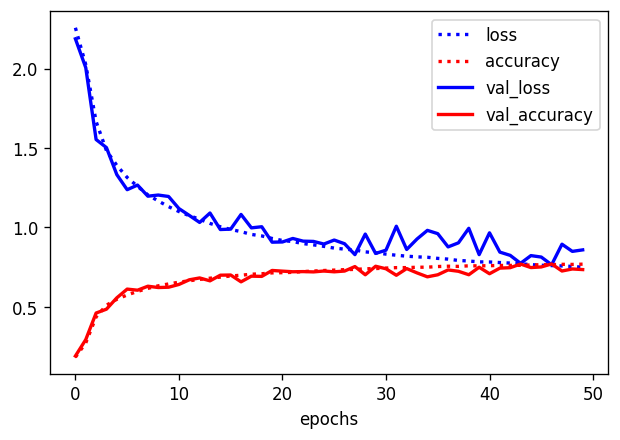

In [32]:
from tensorflow.keras import models
from tensorflow.keras import layers 

def build_model_1_1():

  model = models.Sequential()
  model.add(layers.Reshape((3072,), input_shape=(32,32,3)))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(32, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer='rmsprop',
        loss='categorical_crossentropy',
        metrics=['accuracy'])
  return model

# print(X_train.shape)
# print(X_val.shape)
# print(y_train.shape)
# print(y_val.shape)  
run_evaluation("model_1_1", build_model_1_1, evaluation_split, base_dir, 
               train=True, epochs=50, batch_size=150)

answer_q_1_1 = """
I applied 4 dense layers.First layer has 128 nodes and the following two layers has half as many as previous
layer, the last layer has 10 nodes corresponding to 10 classes.Batch_size is set to 150 this is based on trials,
as other setting would cause much vibration in learning curves.To ensure the model converges,I trained the model
for maximum allowed 50 epochs.Train_acc achieves 76% and val_acc 75%.According to the plotted learning curve, the performance is good. 
               """
print("Answer is {} characters long".format(len(answer_q_1_1)))

### Question 1.2: Preprocessing (2 points)
Rerun the model, but now preprocess the data first by converting the images to 
greyscale. You can use the helper function below. If you want to do additional 
preprocessing, you can do that here, too.
* Store the preprocessed data as a tuple `preprocessed_split`
* Rerun and re-evaluate your model using the preprocessed data.
  * For the remainder of the assignment, always use the preprocessed data
* Explain what you did and interpret the results in 'answer_q_1_2'. Is the model
  better, if so, why?

In [0]:
# Luminance-preserving RGB to greyscale conversion
def rgb2gray(X):
    return np.expand_dims(np.dot(X, [0.2990, 0.5870, 0.1140]), axis=3)

Training the model
Epoch 1/50
424/424 [==============================] - 1s 3ms/step - loss: 2.1851 - accuracy: 0.2116 - val_loss: 2.0818 - val_accuracy: 0.2315
Epoch 2/50
424/424 [==============================] - 1s 3ms/step - loss: 1.7922 - accuracy: 0.3811 - val_loss: 1.6635 - val_accuracy: 0.4390
Epoch 3/50
424/424 [==============================] - 1s 3ms/step - loss: 1.5148 - accuracy: 0.4976 - val_loss: 1.3554 - val_accuracy: 0.5657
Epoch 4/50
424/424 [==============================] - 1s 3ms/step - loss: 1.3648 - accuracy: 0.5584 - val_loss: 1.3608 - val_accuracy: 0.5631
Epoch 5/50
424/424 [==============================] - 1s 3ms/step - loss: 1.2619 - accuracy: 0.5962 - val_loss: 1.3165 - val_accuracy: 0.5858
Epoch 6/50
424/424 [==============================] - 1s 3ms/step - loss: 1.1846 - accuracy: 0.6254 - val_loss: 1.1756 - val_accuracy: 0.6277
Epoch 7/50
424/424 [==============================] - 1s 3ms/step - loss: 1.1316 - accuracy: 0.6450 - val_loss: 1.1880 - val_accu

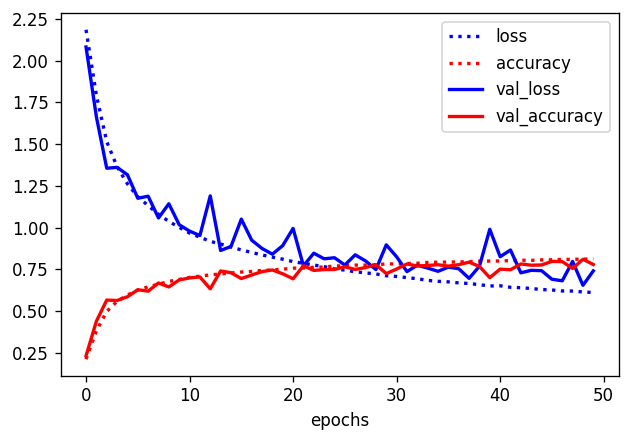

In [34]:
# Replace with the preprocessed data
from tensorflow.keras import models
from tensorflow.keras import layers 
Xg_train = rgb2gray(X_train)
Xg_val = rgb2gray(X_val)
preprocessed_split = Xg_train, Xg_val, y_train, y_val#tuple
#preprocessed_split = rgb2gray(preprocessed_split)
#rgb2gray(preprocessed_split)
# Adjusted model
def build_model_1_2():
  model = models.Sequential()
  model.add(layers.Reshape((1024,), input_shape=(32,32,1)))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(32, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer='rmsprop',
        loss='categorical_crossentropy',
        metrics=['accuracy'])
  return model
  

  

# Evaluate. Use a new name 'model_1_2' to not overwrite the previous trained model
run_evaluation("model_1_2", build_model_1_2, preprocessed_split, base_dir, 
               train=True, epochs=50, batch_size=150)



answer_q_1_2 = """
The model performs better with a 4% increase in accuracy after converting the images to greyscale.
This makes sense as the data is transformed from 3 channel to 1 channel with mroe focus on
gradient information and less interference of noise like lightening. Moreover, this also leads to a 
light-weighted model with less parameters.
               """
print("Answer is {} characters long".format(len(answer_q_1_2)))

### Question 1.3: Regularization and tuning (4 points)
* Regularize the model. You can explore (and combine) different techniques. What works best?
* Tune other hyperparameters (e.g. learning rate, batch size,...) as you see fit.
* Explain your findings and final design decisions. Retrain the model again on the preprocessed data and discuss the results.
* Return your model in function 'build_model_1_3' and write your answer in 'answer_q_1_3'

Training the model
Epoch 1/50
424/424 [==============================] - 2s 5ms/step - loss: 1.4594 - accuracy: 0.5329 - val_loss: 2.0861 - val_accuracy: 0.3254
Epoch 2/50
424/424 [==============================] - 2s 5ms/step - loss: 1.0478 - accuracy: 0.6793 - val_loss: 1.5188 - val_accuracy: 0.5256
Epoch 3/50
424/424 [==============================] - 2s 5ms/step - loss: 0.9190 - accuracy: 0.7184 - val_loss: 1.7684 - val_accuracy: 0.4705
Epoch 4/50
424/424 [==============================] - 2s 5ms/step - loss: 0.8601 - accuracy: 0.7377 - val_loss: 1.9193 - val_accuracy: 0.4359
Epoch 5/50
424/424 [==============================] - 2s 5ms/step - loss: 0.8058 - accuracy: 0.7527 - val_loss: 1.2277 - val_accuracy: 0.6166
Epoch 6/50
424/424 [==============================] - 2s 5ms/step - loss: 0.7670 - accuracy: 0.7673 - val_loss: 1.9790 - val_accuracy: 0.4720
Epoch 7/50
424/424 [==============================] - 2s 5ms/step - loss: 0.7395 - accuracy: 0.7745 - val_loss: 1.3005 - val_accu

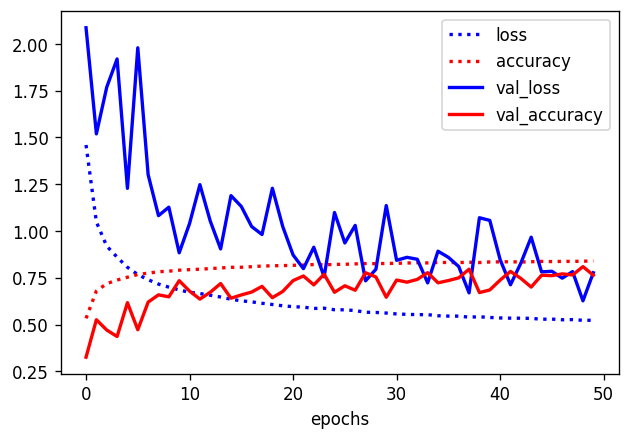

In [35]:
from keras import regularizers
def build_model_1_3():
  model = models.Sequential()
  model.add(layers.Reshape((1024,), input_shape=(32,32,1)))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(32, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer='rmsprop',
        loss='categorical_crossentropy',
        metrics=['accuracy'])
  return model

run_evaluation("model_1_3", build_model_1_3, preprocessed_split, base_dir, 
               train=True, epochs=50, batch_size=150)
answer_q_1_3 = """Regularizers tried: BatchNormalization/dropout/l2
1.adding dropout(0.2) layer after dense128: train_acc = 67.59
         (0.1)             train_acc = 74.79  
2.adding dropout(0.2) layer after dense32: train_acc = 76.19
         (0.1)             train_acc = 79.10
3.batch norm after every dense layer: train_acc = 84.88
4.adding l2 regularizer: train_acc = 73.19
As most of the regularization methods aim at solving the overfitting problem
while model_1_2 is not overfitted, there is thus no need to combine different 
regularization methods and I finally decided to apply BatchNormalization
only and it leads to an increase of ~3% in both train_acc and val_acc.
"""
print("Answer is {} characters long".format(len(answer_q_1_3)))

## Part 2. Convolutional neural networks (10 points)
### Question 2.1: Design a ConvNet (7 points)
- Build a sequential convolutional neural network. Try to achieve the best validation accuracy you can. You should be able to get at least 90% accuracy. You can use any depth, any combination of layers, and any kind of regularization and tuning. 
- Add a description of your design choices in 'answer_q_2_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- You are allowed **800** characters for this answer (but don’t ramble).
- The name of the model should be 'model_2_1'. Evaluate it using the 'run_evaluation' function and the preprocessed data.

Training the model
Epoch 1/40
424/424 [==============================] - 4s 10ms/step - loss: 0.9056 - accuracy: 0.7129 - val_loss: 0.6054 - val_accuracy: 0.8173
Epoch 2/40
424/424 [==============================] - 4s 10ms/step - loss: 0.4225 - accuracy: 0.8735 - val_loss: 0.3255 - val_accuracy: 0.9007
Epoch 3/40
424/424 [==============================] - 4s 10ms/step - loss: 0.3424 - accuracy: 0.8987 - val_loss: 0.3039 - val_accuracy: 0.9068
Epoch 4/40
424/424 [==============================] - 4s 10ms/step - loss: 0.2995 - accuracy: 0.9113 - val_loss: 0.3690 - val_accuracy: 0.8841
Epoch 5/40
424/424 [==============================] - 4s 10ms/step - loss: 0.2775 - accuracy: 0.9183 - val_loss: 0.2416 - val_accuracy: 0.9280
Epoch 6/40
424/424 [==============================] - 4s 10ms/step - loss: 0.2565 - accuracy: 0.9258 - val_loss: 0.2287 - val_accuracy: 0.9342
Epoch 7/40
424/424 [==============================] - 4s 10ms/step - loss: 0.2421 - accuracy: 0.9299 - val_loss: 0.2688 - v

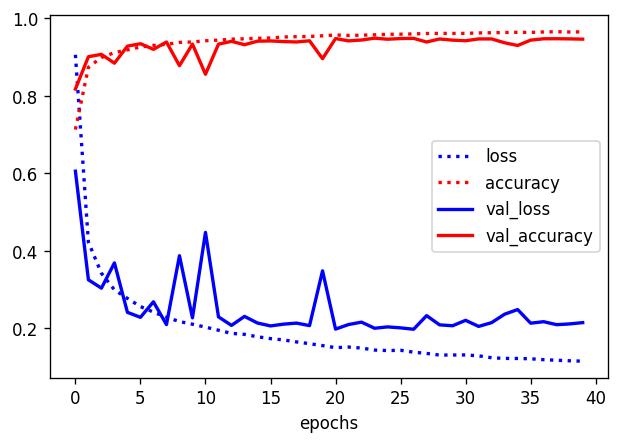

In [36]:
from tensorflow.keras import models
from tensorflow.keras import layers
def build_model_2_1():
  model = models.Sequential()
  #model.add(layers.Reshape((1024,), input_shape=(32,32,1)))
  model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(32,32,1)))#0
  model.add(layers.BatchNormalization())                              #1
  model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))            #2
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.1))
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))            #6
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.2))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))           #12
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))           #14
  model.add(layers.BatchNormalization())                        
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.3))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.3))
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  return model

run_evaluation("model_2_1", build_model_2_1, preprocessed_split, base_dir, 
               train=True, epochs=40, batch_size=150)


In [37]:
answer_q_2_1 = """
model_2_1 is a VGG-like model with 3 'blocks' of convolutional layers and 2 conv layers in each block.
MaxPooling layers are added after each block to retain significant features and reduce feature dimensions. 
There're respectively 16,32,64 filters in each block and zero-padding is applied to build a deeper model. 
Features from last conv layer are flattened to 64 hidden nodes(dense layer). 
Dropouts are added after every MaxPooling and Dense layer with a gradually increased rate to
force layers deep in the model to regularize more than layers closer to the input. I also applied Batch Normalization
to normalize the learned parameters after every Conv layer.
The resulting model achieves decent performance with train_acc above 96% and val_acc over 95%. 
"""
print("Answer is {} characters long".format(len(answer_q_2_1)))

Answer is 764 characters long


### Question 2.2: Data Augmentation (3 points)

- Augment the preprocessed training data. You can explore using image shifts, rotations, zooming, flips, etc. What works well, and what does not?
- Evaluate the model from question 2.1 with the augmented data using the 'run_evaluation' function. Store the new trained model as 'model_2_2'.
- Add a description of your design choices in 'answer_q_2_2': explain what you did and also why. Also discuss the performance of the model.

In [0]:
# Note that we build the same untrained model as in question 2.1 but store the 
# trained version as model_2_2. Change attributes as needed to run on augmented
# data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    shear_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    #horizontal_flip=True)
    #vertical_flip=True)
)
it_train = train_datagen.flow(Xg_train, y_train, batch_size=1024)

augmented_split = it_train,Xg_val,y_val


Training the model
Epoch 1/40
60/60 [==============================] - 13s 219ms/step - loss: 1.7874 - accuracy: 0.4235 - val_loss: 2.2168 - val_accuracy: 0.1910
Epoch 2/40
60/60 [==============================] - 13s 214ms/step - loss: 0.8786 - accuracy: 0.7225 - val_loss: 2.1738 - val_accuracy: 0.2008
Epoch 3/40
60/60 [==============================] - 13s 212ms/step - loss: 0.6464 - accuracy: 0.7997 - val_loss: 1.9171 - val_accuracy: 0.3094
Epoch 4/40
60/60 [==============================] - 13s 212ms/step - loss: 0.5315 - accuracy: 0.8356 - val_loss: 1.6772 - val_accuracy: 0.4398
Epoch 5/40
60/60 [==============================] - 13s 217ms/step - loss: 0.4700 - accuracy: 0.8565 - val_loss: 1.3673 - val_accuracy: 0.5389
Epoch 6/40
60/60 [==============================] - 13s 218ms/step - loss: 0.4285 - accuracy: 0.8717 - val_loss: 0.9611 - val_accuracy: 0.6787
Epoch 7/40
60/60 [==============================] - 13s 216ms/step - loss: 0.3917 - accuracy: 0.8810 - val_loss: 0.5434 - v

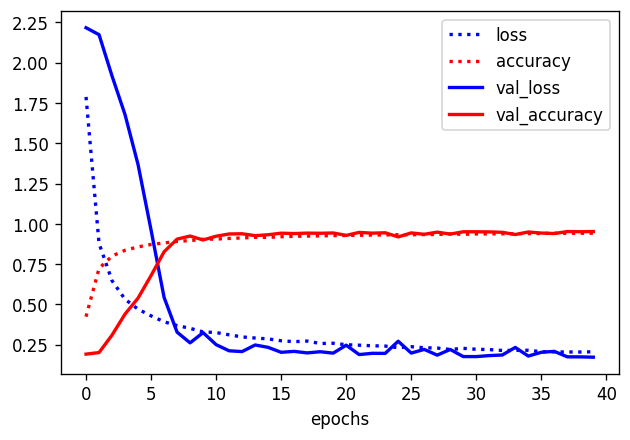

In [39]:
run_evaluation("model_2_2", build_model_2_1, augmented_split, base_dir, 
               train=True,generator=True,epochs=40,batch_size=None)
answer_q_2_2 = """
Various methods like shifting, shearing and flipping are applied in this question.
The train_acc and val_acc both decreased 1% after data augmentation. This can be
explained that most of the samples that lower the accuracy are because of the 
lightening and low resolution of camera, so augmentation methods like shifting, shearing 
and flipping may not be helpful. 
               """
print("Answer is {} characters long".format(len(answer_q_2_2)))

## Part 3. Model interpretation (10 points)
### Question 3.1: Interpreting misclassifications (2 points)
Study which errors are still made by your last model (model_2_2) by evaluating it on the test data. You do not need to retrain the model.
* What is the accuracy of model_2_2 on the test data? Store this in 'test_accuracy_3_1'.
* Plot the confusion matrix in 'plot_confusion_matrix' and discuss which classes are often confused.
* Visualize the misclassifications in more depth by focusing on a single
class (e.g. the number '2') and analyse which kinds of mistakes are made for that class. For instance, are the errors related to the background, noisiness, etc.? Implement the visualization in 'plot_misclassifications'.
* Summarize your findings in 'answer_q_3_1'

acc: 0.9515056904018532
missclassified shape: (963,)
missclassified samples: [   48   114   180   184   190   194   211   234   247   312   368   372
   384   389   397   401   403   429   430   467   491   512   533   540
   559   570   588   616   643   667   685   696   698   714   720   754
   767   774   798   800   820   829   859   889   899   904   920   939
   963  1032  1064  1070  1105  1119  1122  1130  1145  1152  1164  1165
  1166  1182  1205  1224  1268  1283  1284  1404  1420  1441  1477  1518
  1521  1522  1543  1586  1631  1700  1707  1716  1719  1772  1773  1798
  1800  1839  1861  1881  1897  1899  1905  1910  1931  1934  1963  1986
  1987  1997  2000  2016  2035  2046  2049  2053  2066  2072  2087  2109
  2162  2169  2175  2195  2201  2239  2252  2255  2270  2282  2302  2319
  2331  2368  2371  2384  2399  2401  2417  2424  2442  2449  2455  2461
  2467  2478  2484  2505  2523  2559  2566  2570  2602  2662  2694  2695
  2697  2710  2718  2727  2756  2767  2771  278

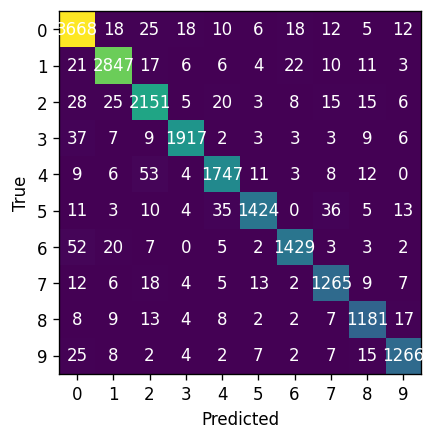

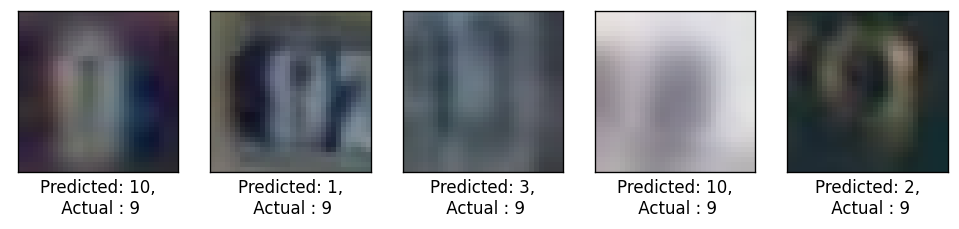

Answer is 721 characters long


In [40]:
test_accuracy_3_1 = 94.84
from keras import metrics
from sklearn.metrics import confusion_matrix
SVHN_classes = {0: "1", 1: "2", 2: "3", 3: "4", 4: "5",
                 5: "6", 6: "7", 7: "8", 8: "9", 9: "10"}

Xg_test = rgb2gray(X_test)
#model = build_model_2_1()
model = load_model_from_file(base_dir,'model_2_2',extension='.h5')
y_pred = model.predict(Xg_test)
#print("acc",np.mean(history.history['val_accuracy']))
#print(metrics.accuracy(y_test, y_pred))
misclassified_samples = np.nonzero(np.argmax(y_test, axis=1) != np.argmax(y_pred, axis=1))[0]
print("acc:",1-misclassified_samples.shape[0]/Xg_test.shape[0])
print('missclassified shape:',misclassified_samples.shape)
print('missclassified samples:',misclassified_samples)

def plot_confusion_matrix():
  cm = confusion_matrix(np.argmax(y_test, axis=1),np.argmax(y_pred, axis=1))
  fig, ax = plt.subplots()
  im = ax.imshow(cm)
  ax.set_xticks(np.arange(10)), ax.set_yticks(np.arange(10))
  # ax.set_xticklabels(list(SVHN_classes.values()), rotation=45, ha="right")
  # ax.set_yticklabels(list(SVHN_classes.values()))
  ax.set_ylabel('True')
  ax.set_xlabel('Predicted')
  for i in range(100):
    ax.text(int(i/10),i%10,cm[i%10,int(i/10)], ha="center", va="center", color="w")
plot_confusion_matrix()
  

def plot_misclassifications():
  j = []
  n = 0
  fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
  for nr, i in enumerate(misclassified_samples[:100]):
    if np.argmax(y_test[i])==8:
      j.append(i)
      axes[n].imshow(X_test[i])
      axes[n].set_xlabel("Predicted: %s,\n Actual : %s" % (SVHN_classes[np.argmax(y_pred[i])],SVHN_classes[np.argmax(y_test[i])]))
      axes[n].set_xticks(()), axes[n].set_yticks(())
      n+=1
    if len(j)>4:
      break

  plt.show()
plot_misclassifications()



answer_q_3_1 = """
According to the confusion matrix, most misclassifications seem to involve 1, 2, and 4. The most common misclassification is between 2 and 4.
This makes sense as the difference between 4 and 2 can be seen as a vertical line.  
Furthermore, I visualize 5 misclassified examples of number 9.
We can see that most of the misclassifications are pretty vague, even for naked eyes. This may due to the resolution of cameras.
And some misclassifications(predicted 3 actual 9)are caused to due the mixture of foreground and background,with no obvious boundaries and contours. 
Missclassifications like 'predicted 5 actual 9' are reasonable as the mere difference between digit number 5 and 9 is a vertical line.                 """
print("Answer is {} characters long".format(len(answer_q_3_1)))

### Question 3.2: Visualizing activations (4 points)
* Implement a function `plot_activations()` that returns the most interesting activations (feature maps). Select the first example from the test set. Retrieve and visualize the activations of model 2_2 for that example (make sure you load that model in the function), for every filter for different convolutional layers (at different depths in the network).
* Give an explanation (as detailed as you can) about your observations in 'answer_q_3_2'. Is your model indeed learning something useful?

Answer is 610 characters long


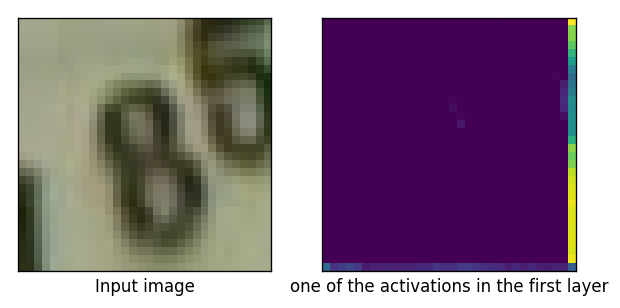

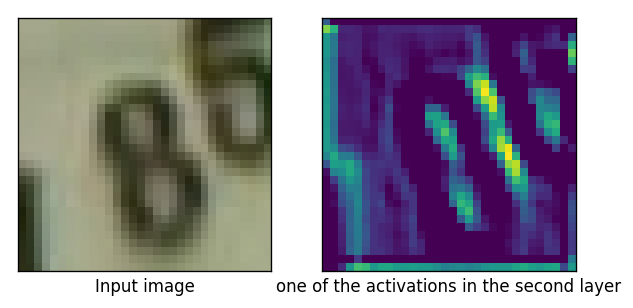

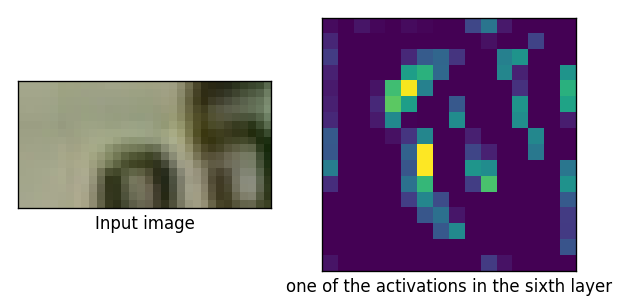

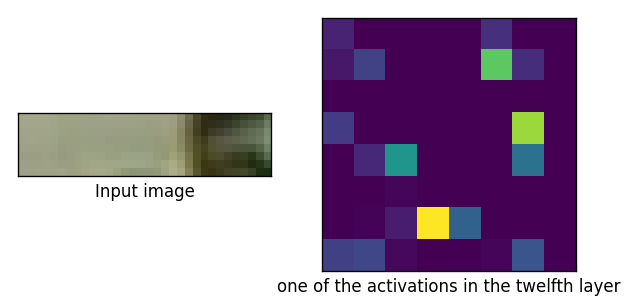

In [41]:
from tensorflow.keras import models

# the most interesting activations
#total 8 conv layers out of top 15 layers
#every conv layer has various activations(kernal)
#in this question, we focus on the second kernal 'first_layer_activation[0, :, :, 2]' of the first conv_layer 'first_layer_activation = activations[0]'

model = load_model_from_file(base_dir,'model_2_2',extension='.h5')

def plot_activations():
   #model.summary()
#select the first example from test set
   img_tensor = X_test[0]
   img_tensor = np.expand_dims(img_tensor, axis=0)#(1,32,32,1)

# Extracts the outputs of the top 8 layers:
   layer_outputs = [layer.output for layer in model.layers[:15]]
# Creates a model that will return these outputs, given the model input:
   activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

# This will return a list of 5 Numpy arrays:
# one array per layer activation
   activations = activation_model.predict(rgb2gray(img_tensor))
#print('shape:',len(activations))#15


   plt.rcParams['figure.dpi'] = 120
   first_layer_activation = activations[0]#(1,32,32,16)16 kernals
   second_layer_activation = activations[2]
   sixth_layer_activation = activations[6]#(1,16,16,32)32 kernals
   twfth_layer_activation = activations[12]#(1,8,8,64)
   #print('shape:',twfth_layer_activation.shape)


   f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
   ax1.imshow(img_tensor[0])#(32,32,1)
   ax2.matshow(first_layer_activation[0, :, :, 6], cmap='viridis')#2 represents filter_2
   ax1.set_xticks([])
   ax1.set_yticks([])
   ax2.set_xticks([])
   ax2.set_yticks([])
   ax1.set_xlabel('Input image')
   ax2.set_xlabel('one of the activations in the first layer')

   f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
   ax1.imshow(img_tensor[0])#(32,32,1)
   ax2.matshow(second_layer_activation[0, :, :, 7], cmap='viridis')#2 represents filter_2
   ax1.set_xticks([])
   ax1.set_yticks([])
   ax2.set_xticks([])
   ax2.set_yticks([])
   ax1.set_xlabel('Input image')
   ax2.set_xlabel('one of the activations in the second layer')

   f, (ax1, ax2) = plt.subplots(1,2,sharey=True)
   ax1.imshow(img_tensor[0])#(32,32,1)
   ax2.matshow(sixth_layer_activation[0, :, :, 2], cmap='viridis')#2 represents filter_2
   ax1.set_xticks([])
   ax1.set_yticks([])
   ax2.set_xticks([])
   ax2.set_yticks([])
   ax1.set_xlabel('Input image')
   ax2.set_xlabel('one of the activations in the sixth layer')

   f, (ax1, ax2) = plt.subplots(1,2, sharey=True)
   ax1.imshow(img_tensor[0])#(32,32,1)
   ax2.matshow(twfth_layer_activation[0, :, :, 2], cmap='viridis')#2 represents filter_2
   ax1.set_xticks([])
   ax1.set_yticks([])
   ax2.set_xticks([])
   ax2.set_yticks([])
   ax1.set_xlabel('Input image')
   ax2.set_xlabel('one of the activations in the twelfth layer')



plot_activations()
  

answer_q_3_2 = """
There're multiple activations in each convolutional layer as each convolutional layer contains many 
filters, I just pick the clear one(understandable) by trial. There're 6 conv layers in model_2_2, I visualize 
4 activations, two of them are from top layers(first and second) and another two from the bottom 
layers(sixth and twelfth). It's easy to tell that activations from top layers are more focused on 
details and close to original image, while activations from bottom layers are more abstract and 
focused on important semantic information which will sent to the classification layer. 
               """
print("Answer is {} characters long".format(len(answer_q_3_2)))

### Question 3.3: Visualizing activations (4 points)
* Again, select the first example from the test set, and the trained model_2_2.
* Implement a function `plot_activation_map()` that builds and shows a class activation map for your last convolutional layer that highlights what the model is paying attention to when classifying the example.
* If possible, superimpossible the activation map over the image. If not, plot
them side by side. Implement a function 'plot_3_3' that returns the entire plot.

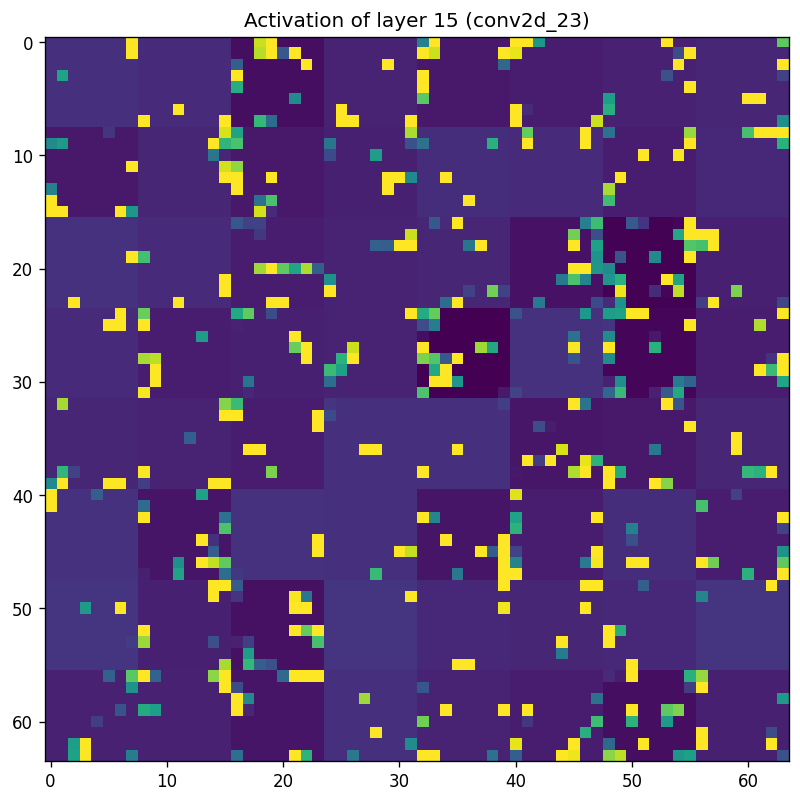

In [42]:
#activation map for last convolutional layer(14)

images_per_row = 8

layer_names = []
for layer in model.layers[:15]:
  layer_names.append(layer.name)

img_tensor = X_test[0]
img_tensor = np.expand_dims(img_tensor, axis=0)
layer_outputs = [layer.output for layer in model.layers[:15]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(rgb2gray(img_tensor))

def plot_3_3(layer_index, activations):
  start = layer_index
  end = layer_index+1
    # Now let's display our feature maps
  for layer_name, layer_activation in zip(layer_names[start:end], activations[start:end]):
        # This is the number of features in the feature map
      n_features = layer_activation.shape[-1]

        # The feature map has shape (1, size, size, n_features)
      size = layer_activation.shape[1]

        # We will tile the activation channels in this matrix
      n_cols = n_features // images_per_row
      display_grid = np.zeros((size * n_cols, images_per_row * size))

        # We'll tile each filter into this big horizontal grid
      for col in range(n_cols):
          for row in range(images_per_row):
              channel_image = layer_activation[0,
                                :, :,
                                col * images_per_row + row]
                # Post-process the feature to make it visually palatable
              channel_image -= channel_image.mean()
              channel_image /= channel_image.std()
              channel_image *= 64
              channel_image += 128
              channel_image = np.clip(channel_image, 0, 255).astype('uint8')
              display_grid[col * size : (col + 1) * size,
                     row * size : (row + 1) * size] = channel_image

        # Display the grid
      scale = 1. / size
      plt.figure(figsize=(scale * display_grid.shape[1],
                scale * display_grid.shape[0]))
      plt.title("Activation of layer {} ({})".format(layer_index+1,layer_name))
      plt.grid(False)
      plt.imshow(display_grid, aspect='auto', cmap='viridis')

  plt.show()
plot_3_3(14, activations)

  

## Part 4. Transfer learning (10 points)
### Question 4.1 Fast feature extraction with VGG16 (5 points)
- Import the VGG16 model, pretrained on ImageNet. [See here](https://keras.io/applications/). Only import the convolutional part, not the dense layers.
- Implement a function 'build_model_4_1` that adds a dense layer to the convolutional base, and freezes the convolutional base. Consider unfreezing the last few convolutional layers and evaluate whether that works better.
- Train the resulting model on the *original* (colored) training data
- Evaluate the resulting model using 'run_evaluate'. Discuss the observed performance in 'answer_q_4_1'.

Training the model
Epoch 1/40
424/424 [==============================] - 12s 28ms/step - loss: 0.9661 - accuracy: 0.6781 - val_loss: 2.2247 - val_accuracy: 0.5552
Epoch 2/40
424/424 [==============================] - 12s 27ms/step - loss: 0.5871 - accuracy: 0.8100 - val_loss: 1.0694 - val_accuracy: 0.7024
Epoch 3/40
424/424 [==============================] - 11s 27ms/step - loss: 0.4966 - accuracy: 0.8421 - val_loss: 0.7354 - val_accuracy: 0.7839
Epoch 4/40
424/424 [==============================] - 11s 27ms/step - loss: 0.4381 - accuracy: 0.8599 - val_loss: 0.6168 - val_accuracy: 0.8176
Epoch 5/40
424/424 [==============================] - 11s 27ms/step - loss: 0.3982 - accuracy: 0.8726 - val_loss: 0.7308 - val_accuracy: 0.7895
Epoch 6/40
424/424 [==============================] - 11s 27ms/step - loss: 0.3627 - accuracy: 0.8839 - val_loss: 0.7223 - val_accuracy: 0.8071
Epoch 7/40
424/424 [==============================] - 11s 27ms/step - loss: 0.3345 - accuracy: 0.8922 - val_loss: 0.8

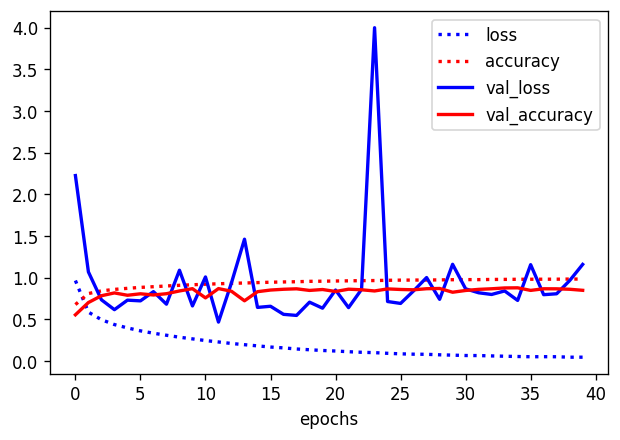

In [66]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import layers
#from keras.models import Model
from tensorflow.keras.models import Sequential
#vgg16 input=224*224; ours is 32*32,no smaller than 32 is ok.

#conv base
                    
#base_model.summary()#without the dense layers


def build_model_4_1():
  VGG = models.Sequential()
  VGG.add(VGG16(input_shape=(32,32,3), include_top=False, classes=10, weights='imagenet'))
  idx = [1, 2, 4, 5, 7, 8, 9, 11, 12, 13, 15, 16, 17]
  #freezes the convolutional base
  for i in idx[:9]:
    layer = VGG.layers[0].layers[i]
    layer.trainable = False


  VGG.add(layers.Flatten())
  VGG.add(layers.Dense(512, activation='relu'))
  VGG.add(layers.BatchNormalization())
  VGG.add(layers.Dropout(0.5))
  VGG.add(layers.Dense(10, activation='softmax'))
  VGG.compile(optimizer='rmsprop',
          loss='categorical_crossentropy',
          metrics=['accuracy'])
  return VGG
'''
  #freezes the convolutional base
  for layer in base_model.layers[:15]:  
    layer.trainable = False
 
  
  #Consider unfreezing the last few convolutional layers
   
  #add a dense layer to conv base
  x = base_model.output
  x = layers.Flatten()(x)
  x = layers.Dense(512, activation='relu', name='fc1')(x)
  x = layers.BatchNormalization()(x)
  x = layers.Dropout(0.5)(x)  # Droupout 0.6
  # x = layers.Dense(512, activation='elu', name='fc2')(x)
  # x = layers.Dropout(0.6)(x)
  predictions = layers.Dense(10, activation='softmax', name='predictions')(x)
  model = Model(input=base_model.input, output=predictions)
  model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])  


  return model
'''  

run_evaluation("model_4_1", build_model_4_1, evaluation_split, base_dir, 
               train=True, epochs=40, batch_size=150)


In [44]:
answer_q_4_1 = """
    if all the conv layers are freezed, the acc is only 70%. In this case, 
    the model rely on the parameters learned from ImageNet, which may not be targeted 
    enough to SVHN dataset.;
    if unfreezing the last 3 conv layers, the acc goes to 97%, as the last
    few conv layers extract features of strong semantic information, which is
    directly sent to classification layer(dense).but obviuosly it takes more time to train
    and the model appears a little overfitting. 
               """
print("Answer is {} characters long".format(len(answer_q_4_1)))

Answer is 494 characters long


### Question 4.2 Embeddings and pipelines (5 points)
- Generate embeddings of the original images by running them through the trained convolutional part of model_4_1 (without the dense layer) and returning the output. Embed the training and test data and store them to disk using the helper functions below. Implement a function `store_embeddings` that loads model_4_1 and stores all necessary embeddings to file. Make sure to run it once so that the embeddings are stored (and submitted).
- Implement a function 'generate_pipeline' that returns an scikit-learn pipeline. You can use any non-deep learning technique (eg. SVMs, RFs,...), and preprocessing technique. You can do model selection using the validation set. 
- Implement a function 'evaluate_pipeline' that evaluates a given pipeline on a given training and test set. 
- Implement a function 'evaluation_4_2' that evaluates your pipeline on the embedded training and test set (loaded from file) and returns the accuracy. 
- Describe what you did and what you observed. Report the obtained accuracy score. Can you beat your best model thus far?

In [75]:
import pickle
import gzip


from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier



def store_embedding(X, name):  
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'wb') as file_pi:
    pickle.dump(X, file_pi)

def load_embedding(name):
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'rb') as file_pi:
    return pickle.load(file_pi)

def store_embeddings():
  model = load_model_from_file(base_dir, "model_4_1")
  #model.summary()
  conv_layer = model.get_layer('vgg16')
  store_embedding(conv_layer.predict(X_train_all), 'vgg16_train_all')
  # store_embedding(conv_layer.predict(X_train), 'vgg16_train')
  # store_embedding(conv_layer.predict(X_val), 'vgg16_val')
  store_embedding(conv_layer.predict(X_test), 'vgg16_test')

def generate_pipeline():
  """ Returns an sklearn pipeline.
  """
  clf = DecisionTreeClassifier(random_state=1)
  pipe = Pipeline(steps=[('classifier', clf)])
  return pipe
  

def evaluate_pipeline(pipeline, X_train, y_train, X_test, y_test):
  """ Evaluates the given pipeline, trained on the given embedded training set and 
      evaluated on the supplied embedded test set. Returns the accuracy score.
  """
  pipeline.fit(X_train, y_train)
  scr1 = pipeline.score(X_test, y_test)
  return scr1

def evaluation_4_2(X_train, y_train, X_test, y_test):
  """ Runs 'evaluate_pipeline' with embedded versions of the input data 
  and returns the accuracy.
  """
  pipe2 = generate_pipeline()
  scr2 = evaluate_pipeline(pipe2, X_train, y_train, X_test, y_test)
  return scr2

store_embeddings()
e_train = load_embedding('vgg16_train_all')
e_test = load_embedding('vgg16_test')

scr = evaluation_4_2(e_train, y_train_all, e_test, y_test)
print("score:",scr)



answer_q_4_2 = """

               """
print("Pipeline:",generate_pipeline())
print("Answer is {} characters long".format(len(answer_q_4_2)))


ValueError: ignored